In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [230]:
rating = pd.read_csv('jester-data-1.csv', header=None)
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [267]:
d = rating.replace(99, np.nan)
d = d.as_matrix()[:, 1:]
d = np.round((d+10)/5)
d = d+1
d = np.nan_to_num(d, 0)
d = d/5
d

array([[ 0.2,  1. ,  0.2, ...,  0. ,  0. ,  0. ],
       [ 0.8,  0.6,  0.8, ...,  0.6,  0.4,  0.6],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.6,  0.8,  0.4, ...,  0. ,  0. ,  0. ]])

In [268]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [269]:
# this is the size of our encoded representations
encoding_dim = 128

# this is our input placeholder
x = Input(shape=(100,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', use_bias=False)(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(100, activation='sigmoid', use_bias=False)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(x, decoded)

In [270]:
# this model maps an input to its encoded representation
encoder = Model(x, encoded)

In [271]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [276]:
autoencoder.compile(optimizer='adadelta', loss='mean_absolute_error')

In [277]:
np.random.shuffle(d)
training, test = d[:22000,:], d[22000:,:]

In [278]:
from keras.callbacks import TensorBoard

In [279]:
datestr = str(datetime.now()).replace(':', '-').split('.')[0]

autoencoder.fit(training, training,
                epochs=1000,
                verbose=2,
                batch_size=256,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='tmp\\deep-layers1-nodes' + str(encoding_dim) + datestr)])

Train on 22000 samples, validate on 2983 samples
Epoch 1/1000
0s - loss: 0.0780 - val_loss: 0.0732
Epoch 2/1000
0s - loss: 0.0722 - val_loss: 0.0713
Epoch 3/1000
0s - loss: 0.0709 - val_loss: 0.0707
Epoch 4/1000
0s - loss: 0.0700 - val_loss: 0.0694
Epoch 5/1000
0s - loss: 0.0692 - val_loss: 0.0687
Epoch 6/1000
0s - loss: 0.0685 - val_loss: 0.0681
Epoch 7/1000
0s - loss: 0.0678 - val_loss: 0.0674
Epoch 8/1000
0s - loss: 0.0672 - val_loss: 0.0672
Epoch 9/1000
0s - loss: 0.0666 - val_loss: 0.0663
Epoch 10/1000
0s - loss: 0.0661 - val_loss: 0.0658
Epoch 11/1000
0s - loss: 0.0656 - val_loss: 0.0654
Epoch 12/1000
0s - loss: 0.0651 - val_loss: 0.0651
Epoch 13/1000
0s - loss: 0.0646 - val_loss: 0.0644
Epoch 14/1000
0s - loss: 0.0642 - val_loss: 0.0639
Epoch 15/1000
0s - loss: 0.0637 - val_loss: 0.0638
Epoch 16/1000
0s - loss: 0.0633 - val_loss: 0.0631
Epoch 17/1000
0s - loss: 0.0628 - val_loss: 0.0628
Epoch 18/1000
0s - loss: 0.0625 - val_loss: 0.0624
Epoch 19/1000
0s - loss: 0.0622 - val_loss

In [280]:
autoencoder.layers[1].get_weights()

[array([[ 0.02960966, -0.28335416,  0.42275512, ..., -0.13875303,
         -0.13074082,  0.17609385],
        [ 0.18208757, -0.12328312, -0.29085833, ...,  0.03048939,
          0.28266609,  0.05202354],
        [-0.07606864, -0.05660693,  0.33719239, ..., -0.21024692,
          0.27836511, -0.11528555],
        ..., 
        [ 0.29949233,  0.01810982, -0.29754207, ...,  0.29898944,
         -0.34897241, -0.33769819],
        [ 0.42672431, -0.13184966,  0.27611533, ..., -0.24456935,
          0.13761872,  0.0594268 ],
        [ 0.34716913, -0.11464643, -0.13711031, ..., -0.46681046,
          0.10893837,  0.16142347]], dtype=float32)]

In [290]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

In [291]:
import matplotlib.pyplot as plt

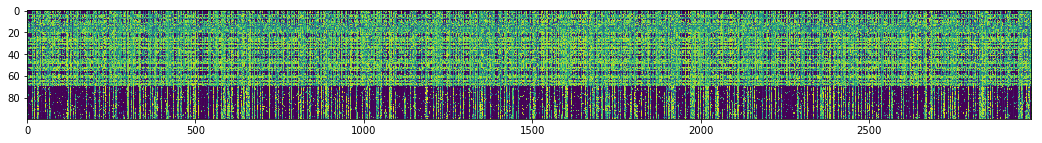

In [292]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(decoded_imgs.transpose(), aspect='auto')

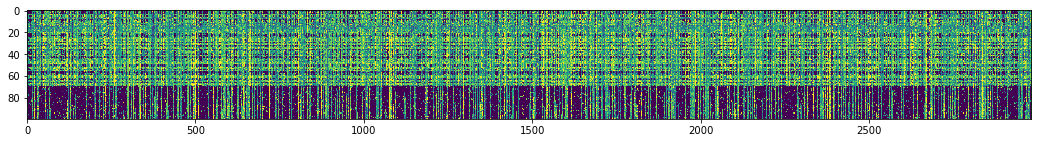

In [284]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(test.transpose(), aspect='auto')

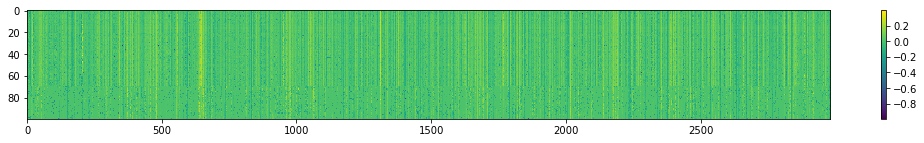

In [285]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow((decoded_imgs-test).transpose(), aspect='auto')
plt.colorbar()

In [288]:
decoded_imgs

array([[  2.65727311e-01,   2.95156032e-01,   2.70547748e-01, ...,
          3.29993144e-02,   3.13113667e-02,   2.45145559e-02],
       [  8.57395351e-01,   8.55762303e-01,   6.79183722e-01, ...,
          3.87233853e-01,   6.88884556e-01,   4.34990883e-01],
       [  4.63975230e-05,   8.38745013e-03,   1.51068598e-05, ...,
          7.05590658e-03,   6.38180180e-03,   9.49335481e-06],
       ..., 
       [  8.96060646e-01,   5.28175831e-01,   8.83291721e-01, ...,
          7.37780035e-01,   9.06327069e-01,   5.20680606e-01],
       [  3.68996024e-01,   1.85954779e-01,   8.08355868e-01, ...,
          5.86881638e-01,   8.16252828e-01,   8.02491009e-01],
       [  4.59674627e-01,   4.55610067e-01,   4.52753156e-01, ...,
          7.72713916e-03,   1.02361599e-02,   3.90239991e-03]], dtype=float32)

In [313]:
liked = np.round(decoded_imgs/0.2)
test_liked = test*5

In [314]:
# Rough accuracy
sum(sum(liked == test_liked))/(liked.shape[0]*liked.shape[1])

0.8648608783104258

In [315]:
# Score error
sum(sum(abs(test_liked-liked))/(liked.shape[0]*liked.shape[1]))

0.13818303721086153

In [316]:
# Absolute error
sum(sum(abs(test-decoded_imgs))/(liked.shape[0]*liked.shape[1]))

0.048291390822397383